In [12]:
#Casino3
import random
import time
import matplotlib.pyplot as plt
import concurrent.futures

In [13]:
def sortlist(list1):
    resList = []
    for item in list1:
        if resList == []:
            resList.append(item)
            continue
        for i in range(len(resList)):
            if item > resList[i]:
                resList.insert(i,item)
                break
    return resList

In [14]:

resDic = {'baozi':0,'shunzi':0,'duizi':0,'else':0}
def check(a):
    for i in range(a*1000):
        d1,d2,d3 = random.randint(1,6),random.randint(1,6),random.randint(1,6)
        dList = [d1,d2,d3]
        dList = sortlist(dList)
        #baozi
        if d1 == d2 == d3:
            resDic['baozi'] += 1
        #shunzi
        elif d1 - d2 == 1 and d2 - d3 == 0:
            resDic['shunzi'] += 1
        #duizi
        elif d1 == d2 or d1 == d3 or d2 == d3:
            resDic['duizi'] += 1
        else:
            resDic['else'] += 1
    return resDic


In [ ]:
number_list = [1,1]

if __name__ == "__main__":
    start_time_2 = time.time()
    with concurrent.futures.ProcessPoolExecutor(max_workers=2) as executor:
        futures = [executor.submit(check, item)
                   for item in number_list]
        for future in concurrent.futures.as_completed(futures):
            print(future.result())
    print("Process pool execution in " +
          str(time.time() - start_time_2), "seconds")


<function matplotlib.pyplot.show(close=None, block=None)>

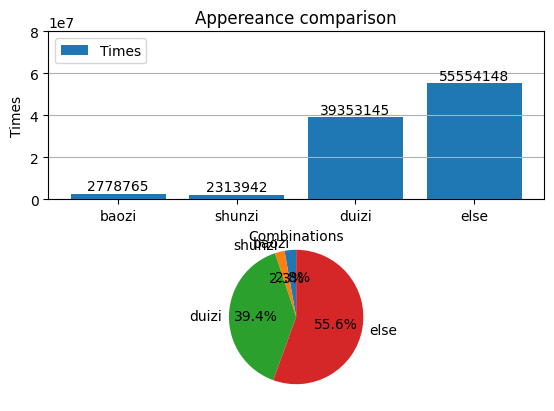

In [19]:


x = ['baozi','shunzi','duizi','else']
y = [2778765, 2313942, 39353145, 55554148]

plt.subplot(2,1,1)
plt.bar(x,y,width=0.8,label='Times')
plt.title('Appereance comparison')
plt.ylabel('Times')
plt.xlabel('Combinations')
plt.ylim(0,80000000)
for a,b in zip(x,y):
    plt.text(a,b,b,va='bottom',ha='center')
plt.grid(axis='y')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.pie(y,labels=x,autopct='%.1f%%',labeldistance=1.1,startangle=90)
plt.savefig
plt.show